# Python for Data Science

Imagine there are two suspects who are making an exchange the authorities want to intercept, but getting an agent to the exchange location too soon would make them suspicious.  The data we will use, which is freely available, is about traffic flow and was obtained from data.gov.uk.  Using this data, and the functions provided in `magic.py`, your task is to determine the optimal time that the agent should leave from Southampton and travel up the M3 to Heathrow Airport.

The exercises below are not assessed, but will give you an introduction to using common Python data structures and methods.  There's even a teaser for some statistical content, which will come in useful for week 4!  The code in `magic.py` will also be helpful for you to look at some of the ways a Python script works. 

In this practice task we are using data gathered from [Data.Gov.UK/dft-eng-srn-routes-journey-times](https://data.gov.uk/dataset/dft-eng-srn-routes-journey-times) as described previously in the Python primer 1 'Bringing it all together'.

## EXERCISE 1
**Please run the following code every time before starting the exercise**.  This helps make sure that all the helper functions are in place.  You can run code by pressing `Crtl` + `Enter`, or `Shift` + `Enter` if you want to move onto the next cell.

In [12]:
from magic import *

## Exercise 2a
Compute the amount of time it will take to get from Southampton to Heathrow for the nth day of the week, year and month, assuming you leave at 07:00.  

Use the `get_arrival_time` function in [magic.py](magic.py) to help if you wish.

In [13]:
# Run this to see the data you have, try changing the value of the leaving_time - what effect does this have?
leaving_time = '07:00'
#Late_arrival = '22:00'

# if you have attempted the exercise listed in 'Brief introduction to Python' you may recognise 'get_data' as
# a function defined in the 'magic' library
# What happens if you try and run your code without the '[0]' at the end?
data = get_data(1, 2013, 1, leaving_time)[0]


# Your code goes here

# total time is initialised at this point so that we can access outside of the loop
total_time = 0

# Remember that a dictionary has a key and a value, \t is used to output a tab space

# This is the header for the data produced in the loop
print('key\ttime taken (s)')

# itterating through the dictionary
for d in data:
    # retrieving the value from the dictionary key
    time_taken = data[d]
    
    # output the dictionary key and it's associated value to make sure that we have the correct data 
    print(d, "\t", time_taken)

    # output arrival time as the total of seconds using the get_arrival_time function
    total_time += time_taken

print("Arrival time: %s" % get_arrival_time(leaving_time, total_time))
### END ANSWER


key	time taken (s)
1 	 190.32
2 	 158.85
3 	 223.14
4 	 93.21
5 	 99.45
6 	 1342.67
7 	 87.55
8 	 264.51
9 	 257.65
10 	 387.22
11 	 310.45
12 	 623.01
13 	 716.88
Arrival time: 08:19:14


## EXERCISE 2b: 
Using the code from EXERCISE 2a, create a function `calculate_arrivals`, which calculates the output for any provided inputs.  The function should contain the parameters:
- `weekday` An integer, the day of the week
- `year` An integer between 2012 and 2014 inclusive
- `month` An integer between 1 and 12 inclusive
- `leaving_time` A string in the format HH:MM, e.g., 07:00

There are usually four weeks in the month, and the order of the data are not guaranteed, so you should not attempt to accurately determine the date at this point.  The data returned will be for the first instance of the `weekday` found in the month

In [14]:
# Copy your answer from EXERCISE 2a here, and make it into a function called "calculate_arrivals".  
# Use that to complete this exercise

# solution to Q2a, notice that get_arrival_time is returned and not printed
def calculate_arrivals(weekday, year, month, leaving_time):
    data = get_data(weekday, year, month, leaving_time)[0]
    total_time = 0
    #print('key\ttime taken (s)')

    for d in data:
        time_taken = data[d]
        #print(d, "\t", time_taken)

        total_time += time_taken

    return get_arrival_time(leaving_time, total_time)


### ANSWER

# set the leaving time to 05:00
leaving_time = '05:00'

# print headings
print('Departure time\tArrival time')

# using the range function to run through the loop 17 times, there are 4 hours between 05:00 and 09:00
# each hour is divided into 4 sections (every 15 minutes) therefore 17 iterations are required

for lt in range(0, 17):
    arr = calculate_arrivals(7, 2013, 1, leaving_time)
    print("leaving: %s arriving: %s" % (leaving_time, arr))
    leaving_time = get_next_time(leaving_time)

### END ANSWER

Departure time	Arrival time
leaving: 05:00 arriving: 05:43:39
leaving: 05:15 arriving: 05:59:00
leaving: 05:30 arriving: 06:14:59
leaving: 05:45 arriving: 06:29:54
leaving: 06:00 arriving: 06:44:28
leaving: 06:15 arriving: 06:59:55
leaving: 06:30 arriving: 07:16:23
leaving: 06:45 arriving: 07:28:47
leaving: 07:00 arriving: 07:42:25
leaving: 07:15 arriving: 07:59:08
leaving: 07:30 arriving: 08:15:29
leaving: 07:45 arriving: 08:30:21
leaving: 08:00 arriving: 08:44:35
leaving: 08:15 arriving: 08:58:40
leaving: 08:30 arriving: 09:14:13
leaving: 08:45 arriving: 09:28:35
leaving: 09:00 arriving: 09:44:31


## EXERCISE 2c: 
Using the solution you produced for EXERCISE 2b, calculate the estimated arrival time for any day in the first week for the first six months, in a single year (2012 - 2014 inclusive).  Return the results as a dictionary in the format:

`{leaving_time: [list of arrival times]}`, e.g. `{'08:15': ['08:57:04', '09:16:28', ...]}`

N.B. This might take a while to run!  Build your solution gradually, so that when you test your code, it doesn't run the entire dataset.

In [15]:
### ANSWER
def loop_calculate_arrivals():
    arrivals_dict = {}
    for d in range(1, 8): # weekday
        for i in range(2012, 2013): # year
            # reminder, range second parameter is n-1
            for j in range(1, 7): # month

                leaving_time = '05:00'
                for lt in range(17):
                    # notice here that the range is 0-17 which is actually 18 items or iterations,
                    # as range does not include the last item (n-1) we are iterating 17 times
                    arr = calculate_arrivals(d, i, j, leaving_time)

                    if not leaving_time in arrivals_dict:
                        arrivals_dict[leaving_time] = []
                    arrivals_dict[leaving_time].append(arr)

                    leaving_time = get_next_time(leaving_time)
    return arrivals_dict

arrivals_dict = loop_calculate_arrivals()

for ad in arrivals_dict:
    print("Leaving at: %s\nArriving at: %s\n" % (ad, str(arrivals_dict[ad])))
    pass

    
### END ANSWER

Leaving at: 07:45
Arriving at: ['08:25:32', '08:54:23', '08:50:23', '08:44:59', '08:31:23', '08:28:44', '08:41:03', '09:00:41', '08:56:05', '08:37:51', '08:56:40', '08:25:55', '08:33:48', '08:38:50', '08:46:15', '08:41:30', '08:38:39', '08:38:45', '08:41:26', '08:45:07', '09:00:08', '08:31:14', '08:46:18', '08:35:21', '08:32:41', '08:33:07', '08:31:58', '08:30:47', '08:30:50', '08:30:40', '08:30:25', '08:28:47', '08:31:50', '08:28:36', '08:27:01', '08:28:04', '08:28:12', '08:29:27', '08:28:13', '08:26:16', '08:28:10', '08:27:53']

Leaving at: 06:00
Arriving at: ['06:45:52', '06:47:06', '06:46:15', '06:44:40', '06:43:19', '06:43:43', '06:44:45', '06:45:14', '06:43:27', '06:45:12', '06:46:17', '06:42:27', '06:43:43', '06:45:27', '06:43:23', '06:43:49', '06:43:39', '06:44:23', '06:44:37', '06:44:17', '06:43:12', '06:43:02', '06:45:57', '06:42:31', '06:43:44', '06:44:41', '06:44:41', '06:42:50', '06:43:14', '06:42:40', '06:45:49', '06:43:37', '06:43:07', '06:40:57', '06:43:27', '06:45:24',

## EXERCISE 3

We now have a considerable amount of data, but it's not very easy to read!  On this amount of data it would be cumersome to perform any calculations manually.  Luckily, Python is good at automating these things employing libraries containing common descriptive statistics methods. We shall be using the NumPy and SciPy libraries.

The data calculated in EXERCISE 2b contains each leaving time, in the first week, of the first six months of a single year.

To calculate the optimal leaving time, we will be using linear regression to perform the analysis.

## EXERCISE 3a
The first step is to determine the mean arrival time for each leaving time for each day in the first week.  

Dealing with time data can be difficult, so to make calculations easier the arrival time is converted into the amount of seconds since midnight. To do this the function `get_time_in_seconds(time_str)` is used which performs this calculation with `time_str` being time in the format HH:MM:SS.

This will return two `array`s for each leaving time (as a string) with the mean arrival time (in seconds), e.g., `{'07:00': 25200}`. This is achieved using the `mean` function from the numpy library. For this to work the `numpy` library of functions must be imported which will allow use a special `numpy` data structure in arrays.  

An array can be created from a list, by running `np.asarray`, as in the example below

In [3]:
import numpy as np
# create a python list
listy = [1, 2, 3, 4]

# Create an array object, the dot notation indicates that asarray is a member of the module np (numpy)
# this creates a new object which is an array object
array_obj = np.asarray(listy)

print(listy, type(listy))
print(array_obj, type(array_obj))

# Get the mean of the array object:
print(listy)
np.mean(array_obj)

[1, 2, 3, 4] <class 'list'>
[1 2 3 4] <class 'numpy.ndarray'>
[1, 2, 3, 4]


2.5

In [17]:
# Your code goes here!  

obj = loop_calculate_arrivals()
means_output = []
cats_output = []
for k in obj.keys():
    new_list = []
    # append is a function which can be called upon a list object
    cats_output.append(get_time_in_seconds(k))
    for li in obj[k]:        
        new_list.append(get_time_in_seconds(li))
    mean = np.mean(np.asarray(new_list))
    means_output.append(mean) 
means_output = np.asarray(means_output)
cats_output = np.asarray(cats_output)
print(cats_output)
print(means_output)

[27900 21600 24300 26100 19800 23400 20700 28800 30600 22500 25200 31500
 32400 29700 18900 18000 27000]
[ 31005.64285714  24270.5         27246.69047619  29203.61904762
  22438.66666667  26252.5         23356.30952381  31816.16666667
  33479.47619048  25229.38095238  28226.02380952  34333.57142857
  35219.85714286  32670.64285714  21525.35714286  20659.02380952
  30141.47619048]


## EXERCISE 3b

Having calculated the mean values a visualisation of the output can be produced. To do this, we will be using the Python library `pyplot`, which is part of `matplotlib`.  The output visualisation will be a scatterplot which has the leaving time as the predictor variable, and the arrival time as the response variable.  

Use the `plt.scatter` function to create a scatterplot to visualise our times.  This function takes as its first two parameters:

* A list of values for the X axis - predictor value, arrival time
* A list of values for the Y axis - response value, leaving time

In other words the arrival times are used to predict an optimal leaving time.

Use the values obtained from Exercise 3a to do this.

In [18]:
# Do the necessary imports
import matplotlib.pyplot as plt
%matplotlib inline

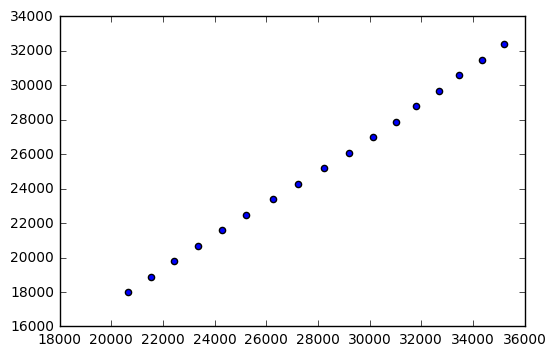

In [19]:
# refer to instructions above
plt.scatter(means_output, cats_output)

## EXERCISE 3c

Having done this, we now need to calculate the regression equation, so we can determine the optimal time for leaving.  The graph may look a bit raw at the moment, but that's okay.  We will fix that soon!

First, we still need to find the equation, plot the line on the graph, and solve it for 09:00.

To solve the equation, we can use the `stats.linregress(first_list, second_list)` in scipy.  Run this now, placing the output into a variable `fx` with the same parameters as you used for the scatter plot, and look at the output:

In [20]:
from scipy import stats
fx = stats.linregress(means_output, cats_output)
# print(fx)

print("slope\t\t", fx.slope)
print("intercept\t", fx.intercept)

slope		 0.975177710149
intercept	 -2166.6360703


The output of the function is an object with different values.  These can be accessed using the dot syntax, i.e., `m = fx.slope`.  We can use these to plot `y = f(x)`, by evaluating `mx + c` as the second parameter in the `plot` function.  Perform the following steps:

* Create a variable `m` from `fx.slope`
* Create a variable `c` from `fx.intercept`
* Plot this equation onto the graph as `plt.plot(leaving_time, m * x + c, '-')`

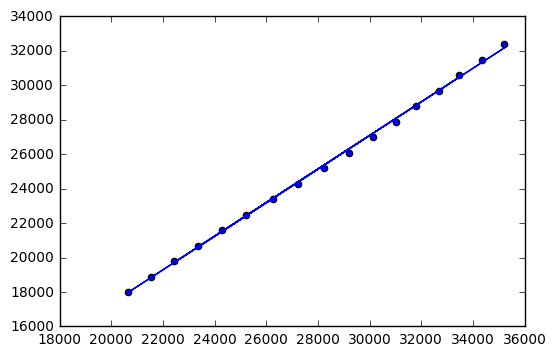

In [21]:
# using 'y=mx+c', the equation for a straight line
m = fx.slope
c = fx.intercept

plt.scatter(means_output, cats_output)

# adding a best fit straight line to the scatter plot
plt.plot(np.asarray(means_output), m * np.asarray(means_output) + c, '-')

Now we have a scatter plot, a regression equation, and both are displayed on a graph.  We can use the graph to get an idea for when we should leave, but we can also solve the equation, and this is our next step.  We already have an equation, so we can substitute the values in to get the answer.

All we need to do is:

* Get the value for 09:00 in seconds rather than the more general case used for the plot
* Get the answer from the equationn
* Convert the answer from seconds to a time

In [22]:
# Your code goes here!
y = m * get_time_in_seconds('09:00') + c
print(get_time_in_str(y))


08:10


## EXERCISE 4 (Optional)

We have an answer, so we could go home.  However, we need to show this to our manager, so ideally we'll get the graph to look a bit better.  Here are some improvements you could make.  Reading documentation about functions is an important skill, so the instructions here are brief and you are expected to read through the documentation at the links.  If you have trouble, try [StackOverflow](https://stackoverflow.com), or ask one of the demonstrators.

* Label the chart and the axes [docs](http://matplotlib.org/users/pyplot_tutorial.html#id3)
* Change the range of the axes using `xlim` and `ylim` [docs](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.xlim)
* Change the axes from seconds to a datetime string.  For this we use `xticks` and `yticks` functions, which require an array of labels, e.g., `['07:00', '07:15'.....]` [docs](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.xticks)
* Increase the size of the plot.  You will need to specify a `plt.figure` before drawing the plot.  This will specify `figsize=(width,height)` as as parameter
* Look at other examples of customisations you can use, for example [here](http://chrisalbon.com/python/matplotlib_simple_scatterplot.html)

### Another Solution?

There are many ways you could try and solve this problem.  We chose linear regression as an example.  If you've finished this, try and think of another way to solve it, and implement that instead!